### APAN5420 Anomaly Detection - Assignment 2 
### Name: Kanyarat Suwannama



# Table of Contents
- <b>[Section 1 Data Preparation](#1)</b>
  - [1.1 Create Data Fields](#11)
- <b>[Section 2 Initial observations](#2)</b>
- <b>[Section 3 Feature Engineering](#3)</b>
  - [3.1 Feature 1: The ratio to average amount by merchant category](#31)
  - [3.2 Feature 2: The ratio to median amount by merchant category](#32)
  - [3.3 Feature 3: The ratio to average amount by merchant category per month](#33)
  - [3.4 Feature 4: The ratio to median amount by merchant category per month](#34)
  - [3.5 Feature 5: The ratio to average amount by day of the week per month](#35)
  - [3.6 Feature 6: The ratio to average amount by person per month in each year](#36)
  - [3.7 Feature 7: The ratio to median amount by person per month in each year](#37)
  - [3.8 Feature 8: The ratio to average amount by person per merchant category](#38)
  - [3.9 Feature 9: The ratio to median amount by person per merchant category](#39)
  - [3.10 Feature 10: The ratio to average amount by vendor per month](#40)
  - [3.11 Feature 11: The ratio to median amount by vendor per month](#41)
  - [3.12 Feature 12: The ratio to average amount by vendor and description](#42)
  - [3.13 Feature 13: The ratio to median amount by vendor and descriotion](#43)
  - [3.14 Feature 14: The ratio to average amount by person, merchant category and vendor per month](#44)
  - [3.15 Feature 15: The ratio to median amount by person, merchant category, and vendor per month](#45)
  
- <b>[Section 4 Conclusion](#4)</b> 
<p>&nbsp;</p>
  
## Section 1 Data Preparation <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("purchase_credit_card.csv")
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [3]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns 
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


###  1.1 Create date fields <a class="anchor" id="11"></a>

In [5]:
# Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])
df['Posted Date']=pd.to_datetime(df['Posted Date'])

df['Year-Month'].dtype
df['Year-Month']=pd.to_datetime(df['Year-Month'], format='%Y%m')
df['Year'] = df['Year-Month'].dt.year
df['Month'] = df['Year-Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction Date'].dt.dayofweek.map(dayOfWeek)
 
df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

## Section 2 Initial observations  <a class="anchor" id="2"></a>

From the graph below, we can see University of OKLAHOMA has the most transactions, followed by Univ. of Okla health science center

<AxesSubplot:xlabel='Count', ylabel='Agency Name'>

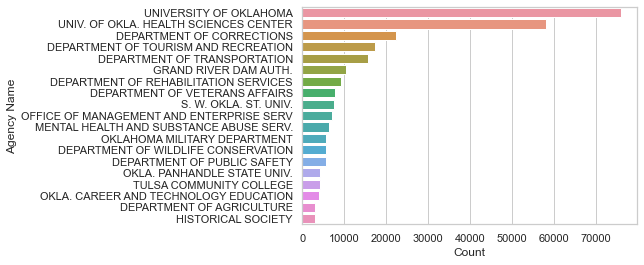

In [6]:
df_count = df['Agency Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency Name','Count']

fig = px.bar(df_count, x='Agency Name', y='Count', color = 'Agency Name', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Agency Name", x="Count", data=df_count[1:20])

## Section 3 Feature Engineering <a class="anchor" id="3"></a>


###  3.1 Feature 1: The ratio to average amount by merchant category<a class="anchor" id="31"></a>
- Grouping by agency, Merchant Category Code (MCC)  and calculate the average amount spent. This helps understand the mean expenditure for an agency per merchant category.

In [7]:
# create average spending grouped by agency and merchant category 
stat_by_agency = df.groupby(['Agency Name', 'Merchant Category Code (MCC)'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency Name                     Merchant Category Code (MCC)                          
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

In [8]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency Name', 'Merchant Category Code (MCC)'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999724
std           7.225363
min       -2735.680000
25%           0.177145
50%           0.515301
75%           1.102916
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

In [9]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut( df1[var],percentile)
df1[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.298, 3.515]"
1,"(0.515, 1.298]"
2,"(0.133, 0.515]"
3,"(1.298, 3.515]"
4,"(0.133, 0.515]"
...,...
442453,"(0.515, 1.298]"
442454,"(0.133, 0.515]"
442455,"(0.0212, 0.133]"
442456,"(8.71, 2735.68]"


[Text(0, 0, '(-2735.681, -0.681]'),
 Text(1, 0, '(-0.681, 0.0212]'),
 Text(2, 0, '(0.0212, 0.133]'),
 Text(3, 0, '(0.133, 0.515]'),
 Text(4, 0, '(0.515, 1.298]'),
 Text(5, 0, '(1.298, 3.515]'),
 Text(6, 0, '(3.515, 8.71]'),
 Text(7, 0, '(8.71, 2735.68]')]

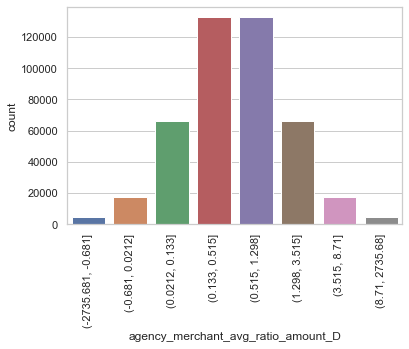

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 8.71, which is the right bar in the graph, then there is probably a fraudulent. 

In [11]:
df1[df1['agency_merchant_avg_ratio_amount']>8.71].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.71, 2735.68]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,59.832149,9.554730,"(8.71, 2735.68]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,392.641168,12.224903,"(8.71, 2735.68]"


###  3.2 Feature 2: The ratio to the median amount by merchant category <a class="anchor" id="32"></a>
- Grouping by Agency, Merchant Category Code (MCC) and Month and obtaining the median amount spent. This helps understand the median expenditure for an agency per merchant category.

In [12]:
# create median spending grouped by agency and merchant category 
stat_by_agency = df.groupby(['Agency Name', 'Merchant Category Code (MCC)'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']
stat_by_agency

Median_amount
Agency Name                     Merchant Category Code (MCC)                             
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         115.12
                                CATALOG MERCHANTS                                   38.16
                                COMPUTER NETWORK/INFORMATION SERVICES               18.34
                                DRUG STORES AND PHARMACIES                         153.45
                                GROCERY STORES,AND SUPERMARKETS                     61.57
...                                                                                   ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                         113.74
                                TRAVEL AGENCIES                                     25.00
                                TROPICANA RESORT AND CASINO                        481.60
                                UNITED AIRLINES                                    510.60
                                WYNDHAM HOTELS                                      87.00

[8427 rows x 1 columns]

In [13]:
# add the new feature median spending to the dataset 
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency Name', 'Merchant Category Code (MCC)'])
# Feature 2: ratio of amount spending and median spending by merchant category 
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

In [14]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut( df2[var],percentile)

[Text(0, 0, '(-1003.177, -1.121]'),
 Text(1, 0, '(-1.121, 0.0653]'),
 Text(2, 0, '(0.0653, 0.362]'),
 Text(3, 0, '(0.362, 1.0]'),
 Text(4, 0, '(1.0, 2.691]'),
 Text(5, 0, '(2.691, 9.283]'),
 Text(6, 0, '(9.283, 28.085]'),
 Text(7, 0, '(28.085, 528116.053]')]

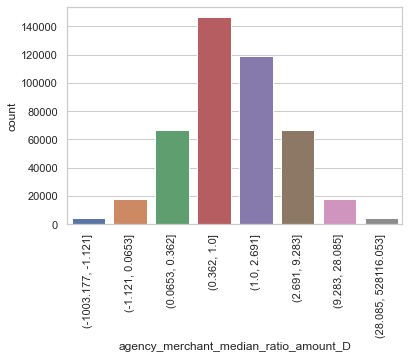

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 28.085, then there is probably a fraudulent. 

In [16]:
df2[df2['agency_merchant_median_ratio_amount']>28.085].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_median_ratio_amount,agency_merchant_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,54.835,44.223580,"(28.085, 528116.053]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,54.835,44.223580,"(28.085, 528116.053]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,154.000,31.168831,"(28.085, 528116.053]"
284,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Boyd,K,GENERAL PURCHASE,4488.84,SONEX ONLINE,2013-07-29,2013-07-30,LUMBER AND BUILDING MATERIALS STORES,2013,7,31,Monday,66.250,67.756075,"(28.085, 528116.053]"
383,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Teel,J,GENERAL PURCHASE,2446.00,PHARMCO PRODUCTS INC,2013-07-30,2013-07-31,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,31,Tuesday,60.500,40.429752,"(28.085, 528116.053]"


###  3.3 Feature 3: The ratio to the average amount by merchant category per month <a class="anchor" id="33"></a>
- Grouping by Agency, Merchant Category Code (MCC) and Month and obtaining the average amount spent. This includes a time perspective to the variable to adjust for time sensitive factors and helps understand the monthly mean expenditure for an agency per merchant category.

In [17]:
# create average spending grouped by Agency, Merchant Category Code (MCC) and Month
stat_by_agency_mcc = df.groupby(['Agency Name', 'Merchant Category Code (MCC)','Month'])['Amount'].mean() 
stat_by_agency_mcc = pd.DataFrame(stat_by_agency_mcc)
stat_by_agency_mcc.columns = ['agency_name_mcc_month_avg_amount']
stat_by_agency_mcc

agency_name_mcc_month_avg_amount
Agency Name                     Merchant Category Code (MCC)               Month                                  
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11                           115.120000
                                CATALOG MERCHANTS                          7                           -637.750000
                                                                           8                            669.080000
                                                                           9                           -334.540000
                                                                           10                           334.540000
...                                                                                                            ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9                            260.450000
                                                                           10                           523.800000
                                                                           12                           199.633333
                                WYNDHAM HOTELS                             1                              0.000000
                                                                           12                           130.596000

[39888 rows x 1 columns]

In [18]:
# add the new feature average spending to the dataset 
df3 = pd.merge(df, stat_by_agency_mcc, how='left', on=['Agency Name', 'Merchant Category Code (MCC)','Month'])
# Feature 3: ratio of amount spending and avergae spending by merchant category per month
df3['agency_name_mcc_month_mean_ratio_amount'] = np.where(df3['agency_name_mcc_month_avg_amount']==0,0, df3['Amount'] / df3['agency_name_mcc_month_avg_amount'])
df3['agency_name_mcc_month_mean_ratio_amount'].describe()

count    4.424580e+05
mean     9.991488e-01
std      5.961952e+13
min     -2.447706e+16
25%      2.017647e-01
50%      5.984763e-01
75%      1.125213e+00
max      3.059633e+16
Name: agency_name_mcc_month_mean_ratio_amount, dtype: float64

In [19]:
# cut by percentile for plotting
var = 'agency_name_mcc_month_mean_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut( df3[var],percentile)

[Text(0, 0, '(-2.4477063974758644e+16, -0.734]'),
 Text(1, 0, '(-0.734, 0.0239]'),
 Text(2, 0, '(0.0239, 0.151]'),
 Text(3, 0, '(0.151, 0.598]'),
 Text(4, 0, '(0.598, 1.34]'),
 Text(5, 0, '(1.34, 3.417]'),
 Text(6, 0, '(3.417, 8.05]'),
 Text(7, 0, '(8.05, 3.0596329968448308e+16]')]

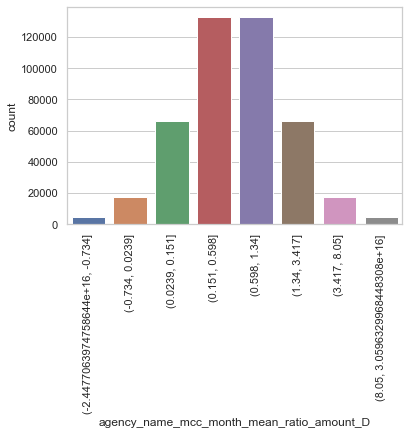

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_name_mcc_month_mean_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 8.05, which is the right bar in the graph, then there is probably a fraudulent. 

In [21]:
df3[df3['agency_name_mcc_month_mean_ratio_amount']>8.05].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,agency_name_mcc_month_avg_amount,agency_name_mcc_month_mean_ratio_amount,agency_name_mcc_month_mean_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,54.011368,10.584438,"(8.05, 3.0596329968448308e+16]"
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,334.757634,9.219118,"(8.05, 3.0596329968448308e+16]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,568.982548,8.436111,"(8.05, 3.0596329968448308e+16]"


###  3.4 Feature 4: The ratio to the median amount by merchant category per month <a class="anchor" id="34"></a>
- Grouping by Agency, Merchant Category Code (MCC) and Month and obtaining the median amount spent. This includes a time perspective to the variable to adjust for time sensitive factors and helps understand the monthly median expenditure for an agency per merchant category.

In [22]:
# create median spending grouped by Agency, Merchant Category Code (MCC) and Month 
stat_by_agency_mcc = df.groupby(['Agency Name', 'Merchant Category Code (MCC)','Month'])['Amount'].median() 
stat_by_agency_mcc = pd.DataFrame(stat_by_agency_mcc)
stat_by_agency_mcc.columns = ['agency_name_mcc_month_median_amount']
stat_by_agency_mcc

agency_name_mcc_month_median_amount
Agency Name                     Merchant Category Code (MCC)               Month                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11                                  115.12
                                CATALOG MERCHANTS                          7                                  -637.75
                                                                           8                                   669.08
                                                                           9                                  -334.54
                                                                           10                                  334.54
...                                                                                                               ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9                                   510.60
                                                                           10                                  523.80
                                                                           12                                  181.80
                                WYNDHAM HOTELS                             1                                     0.00
                                                                           12                                   87.00

[39888 rows x 1 columns]

In [23]:
# add the new feature median spending to the dataset 
df4 = pd.merge(df, stat_by_agency_mcc, how='left', on=['Agency Name', 'Merchant Category Code (MCC)','Month'])
# Feature 4: ratio of amount spending and median spending grouped by merchant category per month 
df4['agency_name_mcc_month_median_amount_ratio'] = np.where(df4['agency_name_mcc_month_median_amount']==0,0, df4['Amount'] / df4['agency_name_mcc_month_median_amount'])
df4['agency_name_mcc_month_median_amount_ratio'].describe()

count    442458.000000
mean          5.010047
std        1195.766096
min      -29642.000000
25%           0.500000
50%           1.000000
75%           1.912717
max      598420.505983
Name: agency_name_mcc_month_median_amount_ratio, dtype: float64

In [24]:
# cut by percentile for plotting
var = 'agency_name_mcc_month_median_amount_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut( df4[var],percentile)

[Text(0, 0, '(-29642.001, -1.103]'),
 Text(1, 0, '(-1.103, 0.0687]'),
 Text(2, 0, '(0.0687, 0.389]'),
 Text(3, 0, '(0.389, 1.0]'),
 Text(4, 0, '(1.0, 2.425]'),
 Text(5, 0, '(2.425, 8.71]'),
 Text(6, 0, '(8.71, 27.182]'),
 Text(7, 0, '(27.182, 598420.506]')]

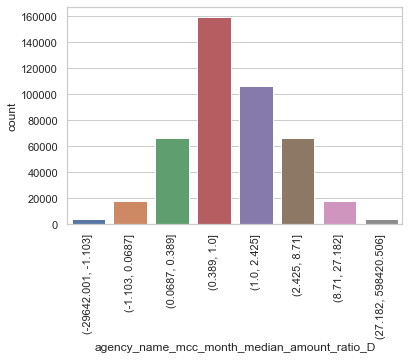

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_name_mcc_month_median_amount_ratio_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 27.182, which is the right bar in the graph, then there is probably a fraudulent. 

In [26]:
df4[df4['agency_name_mcc_month_median_amount_ratio']>27.182].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,agency_name_mcc_month_median_amount,agency_name_mcc_month_median_amount_ratio,agency_name_mcc_month_median_amount_ratio_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,60.535,40.059470,"(27.182, 598420.506]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,60.535,40.059470,"(27.182, 598420.506]"
284,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Boyd,K,GENERAL PURCHASE,4488.84,SONEX ONLINE,2013-07-29,2013-07-30,LUMBER AND BUILDING MATERIALS STORES,2013,7,31,Monday,101.160,44.373665,"(27.182, 598420.506]"
383,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Teel,J,GENERAL PURCHASE,2446.00,PHARMCO PRODUCTS INC,2013-07-30,2013-07-31,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,31,Tuesday,55.025,44.452522,"(27.182, 598420.506]"
442,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,KELOUGH,N,GENERAL PURCHASE,2057.31,LOCKE SUPPLY OKMULGEE,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,60.535,33.985463,"(27.182, 598420.506]"


### 3.5 Feature 5: The ratio of average amount by day of the week per month<a class="anchor" id="35"></a>
- Grouping by Agency, Day of week, Month and obtaining the average amount spent. This helps understand the expenditure for an agency per day of each month.

In [27]:
# create average spending grouped by Agency, Day of week and Month
stat_by_day = df.groupby(['Agency Name','Day_of_Week', 'Month'])['Amount'].mean()
stat_by_day = pd.DataFrame(stat_by_day)
stat_by_day.columns = ['agency_average_amount']
stat_by_day

agency_average_amount
Agency Name                     Day_of_Week Month                       
ARDMORE HIGHER EDUCATION CENTER Friday      7                -606.420000
                                            8                 669.080000
                                            9                   6.480000
                                            10                 35.030000
                                            11                115.120000
...                                                                  ...
`DEPARTMENT OF EDUCATION        Wednesday   8                 295.290556
                                            9                 248.078537
                                            10                403.617931
                                            11                206.681967
                                            12                190.729412

[7095 rows x 1 columns]

In [28]:
# add the new feature average spending to the dataset
df5 = pd.merge(df, stat_by_day, how='left', on=['Agency Name','Day_of_Week','Month'])
# Feature 5: ratio of amount spending and average amounts by day of the week per month
df5['agc_avg_amount_ratio'] = np.where(df5['agency_average_amount']==0,0, df5['Amount'] / df5['agency_average_amount'])
df5['agc_avg_amount_ratio'].describe()

count    442458.000000
mean          0.999959
std           3.946176
min        -947.095785
25%           0.092911
50%           0.316885
75%           1.003435
max         875.370264
Name: agc_avg_amount_ratio, dtype: float64

In [29]:
# cut by percentile for plotting
var = 'agc_avg_amount_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut( df5[var],percentile)

[Text(0, 0, '(-947.097, -0.521]'),
 Text(1, 0, '(-0.521, 0.0126]'),
 Text(2, 0, '(0.0126, 0.07]'),
 Text(3, 0, '(0.07, 0.317]'),
 Text(4, 0, '(0.317, 1.285]'),
 Text(5, 0, '(1.285, 3.977]'),
 Text(6, 0, '(3.977, 10.539]'),
 Text(7, 0, '(10.539, 875.37]')]

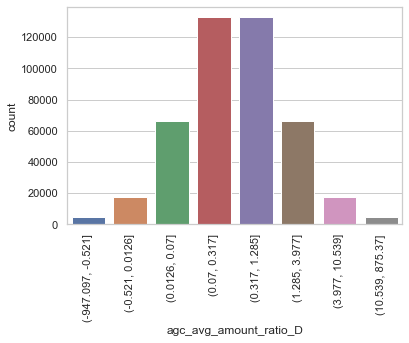

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agc_avg_amount_ratio_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 10.539, then there is probably a fraudulent. 

In [31]:
df5[df5['agc_avg_amount_ratio']>10.539].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,agency_average_amount,agc_avg_amount_ratio,agc_avg_amount_ratio_D
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,304.996325,11.744404,"(10.539, 875.37]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.00,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,341.824495,11.219208,"(10.539, 875.37]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,274.003438,17.518028,"(10.539, 875.37]"
259,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,GENERAL PURCHASE,3456.64,NASA CATERING 30550511,2013-07-30,2013-07-31,CATERERS,2013,7,31,Tuesday,274.003438,12.615316,"(10.539, 875.37]"
284,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Boyd,K,GENERAL PURCHASE,4488.84,SONEX ONLINE,2013-07-29,2013-07-30,LUMBER AND BUILDING MATERIALS STORES,2013,7,31,Monday,295.759002,15.177357,"(10.539, 875.37]"


###  3.6 Feature 6: The ratio to the average amount by person per month in each year<a class="anchor" id="36"></a>
- Grouping by Year, Month and Cardholder Last Name and obtaining the average amount spent. This helps understand the average monthly expenditure in year per person.

In [32]:
# create average spending grouped by Year, Month, Cardholder Last Name
stat_by_cardholder = df.groupby(['Year', 'Month','Cardholder Last Name'])['Amount'].mean() 
stat_by_cardholder = pd.DataFrame(stat_by_cardholder)
stat_by_cardholder.columns = ['mean_expense_person_person']
stat_by_cardholder

mean_expense_person_person
Year Month Cardholder Last Name                            
2013 7     24100                                 906.495000
           42000                                   1.170000
           44600                                 111.990000
           81500                              171619.610000
           88000                                   0.000000
...                                                     ...
2014 6     Zhang                                 183.351786
           Zummer                                313.130000
           d'Offay                               151.350000
           de Leon                               406.137500
           russell                               308.040571

[33159 rows x 1 columns]

In [33]:
# add the new feature average spending to the dataset 
df6 = pd.merge(df, stat_by_cardholder, how='left', on=['Year', 'Month','Cardholder Last Name'])
# Feature 6: ratio of amount spending and average spending grouped by person per month in each year
df6['monthly_avg_person_ratio_amount'] = np.where(df6['mean_expense_person_person']==0,0, df6['Amount'] / df6['mean_expense_person_person'])
df6['monthly_avg_person_ratio_amount'].describe()

count    4.424580e+05
mean     9.970269e-01
std      1.483136e+14
min     -7.151575e+16
25%      1.462491e-01
50%      4.953091e-01
75%      1.271066e+00
max      6.403556e+16
Name: monthly_avg_person_ratio_amount, dtype: float64

In [34]:
# cut by percentile for plotting
var = 'monthly_avg_person_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut( df6[var],percentile)

[Text(0, 0, '(-7.151575470775992e+16, -0.827]'),
 Text(1, 0, '(-0.827, 0.0177]'),
 Text(2, 0, '(0.0177, 0.106]'),
 Text(3, 0, '(0.106, 0.495]'),
 Text(4, 0, '(0.495, 1.556]'),
 Text(5, 0, '(1.556, 3.741]'),
 Text(6, 0, '(3.741, 7.737]'),
 Text(7, 0, '(7.737, 6.403555720167424e+16]')]

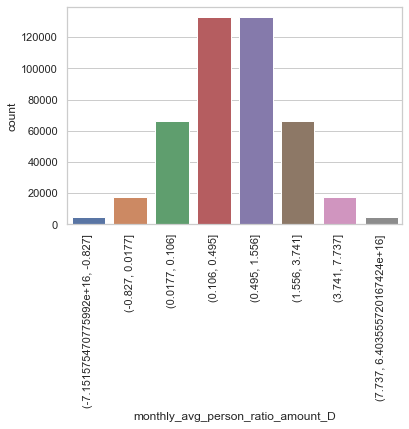

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="monthly_avg_person_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 7.737, then there is probably a fraudulent. 

In [36]:
df6[df6['monthly_avg_person_ratio_amount']>7.737].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,mean_expense_person_person,monthly_avg_person_ratio_amount,monthly_avg_person_ratio_amount_D
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,306.574299,10.066630,"(7.737, 6.403555720167424e+16]"
169,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Aichele,C,T25 DIGITAL PROMO PKG 115V EA,2497.36,VWR INTERNATIONAL INC,2013-07-30,2013-07-30,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,31,Tuesday,103.152222,24.210433,"(7.737, 6.403555720167424e+16]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,396.326875,12.111215,"(7.737, 6.403555720167424e+16]"
284,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Boyd,K,GENERAL PURCHASE,4488.84,SONEX ONLINE,2013-07-29,2013-07-30,LUMBER AND BUILDING MATERIALS STORES,2013,7,31,Monday,156.666574,28.652187,"(7.737, 6.403555720167424e+16]"
352,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Hunt,A,SHIPPING-FUEL SURCHARGE EA|MICRO SPATULA TAPER...,4362.80,FISHER SCI HUS,2013-07-27,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Saturday,508.087647,8.586707,"(7.737, 6.403555720167424e+16]"


###  3.7 Feature 7: The ratio to the median amount by person per month in each year<a class="anchor" id="37"></a>
- Grouping by Year, Month and Cardholder Last Name and obtaining the median amount spent. This helps understand the median monthly expenditure in year per person.

In [37]:
# create median spending grouped by Year, Month, Cardholder Last Name
stat_by_cardholder = df.groupby(['Year', 'Month','Cardholder Last Name'])['Amount'].median() 
stat_by_cardholder = pd.DataFrame(stat_by_cardholder)
stat_by_cardholder.columns = ['median_expense_person_person']
stat_by_cardholder

median_expense_person_person
Year Month Cardholder Last Name                              
2013 7     24100                                      906.495
           42000                                        1.170
           44600                                      111.990
           81500                                   171619.610
           88000                                        0.000
...                                                       ...
2014 6     Zhang                                       67.455
           Zummer                                     189.910
           d'Offay                                    151.350
           de Leon                                    243.935
           russell                                    132.000

[33159 rows x 1 columns]

In [38]:
# add the new feature median spending to the dataset 
df7 = pd.merge(df, stat_by_cardholder, how='left', on=['Year', 'Month','Cardholder Last Name'])
# Feature 7: ratio of the amount spending and median spending by person per month in each year 
df7['monthly_median_person_ratio_amount'] = np.where(df7['median_expense_person_person']==0,0, df7['Amount'] / df7['median_expense_person_person'])
df7['monthly_median_person_ratio_amount'].describe()

count    442458.000000
mean          2.773682
std          85.479848
min      -49090.000000
25%           0.401202
50%           1.000000
75%           2.343775
max        6000.000000
Name: monthly_median_person_ratio_amount, dtype: float64

In [39]:
# cut by percentile for plotting
var = 'monthly_median_person_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut( df7[var],percentile)

[Text(0, 0, '(-49090.001, -1.473]'),
 Text(1, 0, '(-1.473, 0.0511]'),
 Text(2, 0, '(0.0511, 0.294]'),
 Text(3, 0, '(0.294, 1.0]'),
 Text(4, 0, '(1.0, 3.037]'),
 Text(5, 0, '(3.037, 11.36]'),
 Text(6, 0, '(11.36, 32.079]'),
 Text(7, 0, '(32.079, 6000.0]')]

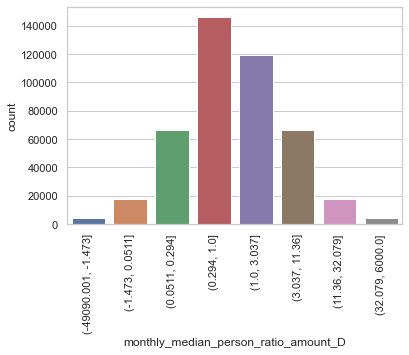

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="monthly_median_person_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 32.079, then there is probably a fraudulent. 

In [41]:
df7[df7['monthly_median_person_ratio_amount']>32.079].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,median_expense_person_person,monthly_median_person_ratio_amount,monthly_median_person_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,57.755,41.987707,"(32.079, 6000.0]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,57.755,41.987707,"(32.079, 6000.0]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.00,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,71.310,53.779274,"(32.079, 6000.0]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,81.815,58.668948,"(32.079, 6000.0]"
284,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Boyd,K,GENERAL PURCHASE,4488.84,SONEX ONLINE,2013-07-29,2013-07-30,LUMBER AND BUILDING MATERIALS STORES,2013,7,31,Monday,10.635,422.081805,"(32.079, 6000.0]"


###  3.8 Feature 8: The ratio to the average amount by person per merchant category<a class="anchor" id="38"></a>
- Grouping by Cardholder Last Name and Merchant Category Code (MCC) and obtaining the average amount spent by a person in a merchant category. It helps form a pattern and identify outliers.

In [42]:
# create average spending grouped by Cardholder Last Name and Merchant Category Code (MCC)
stat_by_cardholder_mcc = df.groupby(['Cardholder Last Name','Merchant Category Code (MCC)'])['Amount'].mean()
stat_by_cardholder_mcc = pd.DataFrame(stat_by_cardholder_mcc)
stat_by_cardholder_mcc.columns = ['mean_mcc_person']
stat_by_cardholder_mcc

mean_mcc_person
Cardholder Last Name Merchant Category Code (MCC)                 
15000                OTHER FEES                        4626.460000
24100                OTHER FEES                         278.409000
42000                OTHER FEES                         133.998125
44600                OTHER FEES                         111.990000
48000                OTHER FEES                          96.774615
...                                                            ...
russell              RESIDENCE INN                       94.220000
                     SLEEP INN                          166.000000
                     SOUTHWEST AIRLINES                 537.125000
                     TRAVEL AGENCIES                     25.000000
                     UNITED AIRLINES                    568.000000

[62729 rows x 1 columns]

In [43]:
# add the new feature average spending to the dataset 
df8 = pd.merge(df, stat_by_cardholder_mcc, how='left', on=['Cardholder Last Name','Merchant Category Code (MCC)'])
# Feature 8: ratio of amount spending and avergae spending by person per mechant category 
df8['mean_mcc_person_ratio_amount'] = np.where(df8['mean_mcc_person']==0,0, df8['Amount'] / df8['mean_mcc_person'])
df8['mean_mcc_person_ratio_amount'].describe()

count    4.424580e+05
mean     7.505888e-01
std      4.278259e+15
min     -7.901622e+17
25%      3.305262e-01
50%      8.043463e-01
75%      1.202264e+00
max      7.901622e+17
Name: mean_mcc_person_ratio_amount, dtype: float64

In [44]:
# cut by percentile for plotting
var = 'mean_mcc_person_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut( df8[var],percentile)

[Text(0, 0, '(-7.901621841216878e+17, -0.907]'),
 Text(1, 0, '(-0.907, 0.0342]'),
 Text(2, 0, '(0.0342, 0.248]'),
 Text(3, 0, '(0.248, 0.804]'),
 Text(4, 0, '(0.804, 1.392]'),
 Text(5, 0, '(1.392, 2.946]'),
 Text(6, 0, '(2.946, 5.97]'),
 Text(7, 0, '(5.97, 7.901621841216878e+17]')]

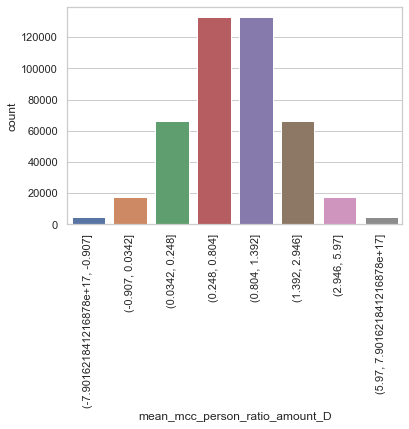

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="mean_mcc_person_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 5.97, which is the right bar in the graph, then there is probably a fraudulent. 

In [46]:
df8[df8['mean_mcc_person_ratio_amount']>5.97].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,mean_mcc_person,mean_mcc_person_ratio_amount,mean_mcc_person_ratio_amount_D
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,413.279535,7.467512,"(5.97, 7.901621841216878e+17]"
159,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Steanson,A,GENERAL PURCHASE,596.00,FITZGERALD INDUSTRIES,2013-07-30,2013-07-31,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,31,Tuesday,91.270652,6.530029,"(5.97, 7.901621841216878e+17]"
198,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Potts,J,GENERAL PURCHASE,4800.00,SALIMETRICS LLC,2013-07-30,2013-07-31,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,342.446000,14.016808,"(5.97, 7.901621841216878e+17]"
352,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Hunt,A,SHIPPING-FUEL SURCHARGE EA|MICRO SPATULA TAPER...,4362.80,FISHER SCI HUS,2013-07-27,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Saturday,468.397143,9.314318,"(5.97, 7.901621841216878e+17]"
365,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,WARD,A,GENERAL PURCHASE,929.16,D & H DISTRIBUTING,2013-07-30,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,31,Tuesday,142.440000,6.523168,"(5.97, 7.901621841216878e+17]"


###  3.9 Feature 9: The ratio to the median by person per mechant category<a class="anchor" id="39"></a>
- Grouping by Cardholder Last Name and Merchant Category Code (MCC) and obtaining the median amount spent by a person in a merchant category. It helps form a pattern and identify outliers.

In [47]:
# create median spending grouped by Cardholder Last Name and Merchant Category Code (MCC)
stat_by_cardholder_mcc = df.groupby(['Cardholder Last Name','Merchant Category Code (MCC)'])['Amount'].median() 
stat_by_cardholder_mcc = pd.DataFrame(stat_by_cardholder_mcc)
stat_by_cardholder_mcc.columns = ['median_mcc_person']
stat_by_cardholder_mcc

median_mcc_person
Cardholder Last Name Merchant Category Code (MCC)                   
15000                OTHER FEES                             4626.460
24100                OTHER FEES                               10.535
42000                OTHER FEES                                2.390
44600                OTHER FEES                              111.990
48000                OTHER FEES                                6.530
...                                                              ...
russell              RESIDENCE INN                            94.220
                     SLEEP INN                               166.000
                     SOUTHWEST AIRLINES                      487.500
                     TRAVEL AGENCIES                          25.000
                     UNITED AIRLINES                         568.000

[62729 rows x 1 columns]

In [48]:
# add the new feature median spending to the dataset 
df9 = pd.merge(df, stat_by_cardholder_mcc, how='left', on=['Cardholder Last Name','Merchant Category Code (MCC)'])
# Feature 9: ratio of amount spending and median spending by person per mechant category
df9['median_mcc_person_ratio_amount'] = np.where(df9['median_mcc_person']==0,0, df9['Amount'] / df9['median_mcc_person'])
df9['median_mcc_person_ratio_amount'].describe()

count    4.424580e+05
mean     1.051513e+02
std      4.860020e+04
min     -8.195918e+02
25%      6.056647e-01
50%      1.000000e+00
75%      1.540674e+00
max      2.379823e+07
Name: median_mcc_person_ratio_amount, dtype: float64

In [49]:
# cut by percentile for plotting
var = 'median_mcc_person_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut( df9[var],percentile)

[Text(0, 0, '(-819.593, -1.074]'),
 Text(1, 0, '(-1.074, 0.0739]'),
 Text(2, 0, '(0.0739, 0.475]'),
 Text(3, 0, '(0.475, 1.0]'),
 Text(4, 0, '(1.0, 1.868]'),
 Text(5, 0, '(1.868, 5.939]'),
 Text(6, 0, '(5.939, 18.132]'),
 Text(7, 0, '(18.132, 23798229.625]')]

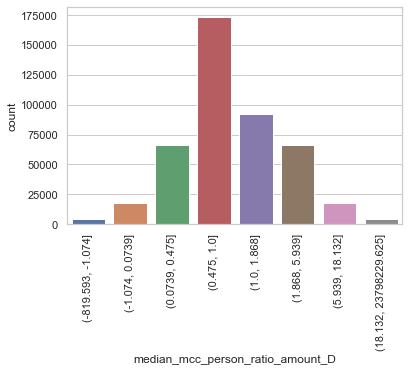

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_mcc_person_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 18.132, which is the right bar in the graph, then there is probably a fraudulent. 

In [51]:
df9[df9['median_mcc_person_ratio_amount']>18.132].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,median_mcc_person,median_mcc_person_ratio_amount,median_mcc_person_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,16.830,144.087938,"(18.132, 23798229.625]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,16.830,144.087938,"(18.132, 23798229.625]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,109.070,21.886953,"(18.132, 23798229.625]"
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,136.280,22.645803,"(18.132, 23798229.625]"
159,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Steanson,A,GENERAL PURCHASE,596.00,FITZGERALD INDUSTRIES,2013-07-30,2013-07-31,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,31,Tuesday,27.235,21.883606,"(18.132, 23798229.625]"


###  3.10 Feature 10: The ratio to average amount by vendor per month<a class="anchor" id="40"></a>
- Grouping by Agency, Vendor, Month and obtaining the average amount spent. This includes a time perspective to the variable to adjust for time sensitive factors and helps to understand the monthly mean expenditure in an agency per vendor. 

In [52]:
# create average spending grouped by Agency, Vendor and Month
stat_by_agency_ved = df.groupby(['Agency Name', 'Vendor', 'Month'])['Amount'].mean() 
stat_by_agency_ved = pd.DataFrame(stat_by_agency_ved)
stat_by_agency_ved.columns = ['mean_agency_vendor']
stat_by_agency_ved

mean_agency_vendor
Agency Name                     Vendor               Month                    
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS        12                 92.500
                                CDW GOVERNMENT       7                -637.750
                                                     8                 669.080
                                                     9                -334.540
                                                     10                334.540
...                                                                        ...
`DEPARTMENT OF EDUCATION        WWW.LOGMEIN.COM      11                149.000
                                WYNDHAM GARDEN HOTEL 1                   0.000
                                                     12                130.596
                                XPEDX-INTL PAPER     8                 180.700
                                                     12                558.680

[189209 rows x 1 columns]

In [53]:
# add the new feature average spending to the dataset
df10 = pd.merge(df, stat_by_agency_ved, how='left', on=['Agency Name', 'Vendor', 'Month'])
# Feature 10: the ratio of amount spending and avergae spending by vendor per month
df10['mean_agency_vendor_ratio'] = np.where(df10['mean_agency_vendor']==0,0, df10['Amount'] / df10['mean_agency_vendor'])
df10['mean_agency_vendor_ratio'].describe()

count    4.424580e+05
mean     9.780906e-01
std      3.650538e+14
min     -1.266826e+17
25%      4.630255e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.263193e+17
Name: mean_agency_vendor_ratio, dtype: float64

In [54]:
# cut by percentile for plotting
var = 'mean_agency_vendor_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut( df10[var],percentile)

[Text(0, 0, '(-1.2668256604282766e+17, -0.449]'),
 Text(1, 0, '(-0.449, 0.0559]'),
 Text(2, 0, '(0.0559, 0.337]'),
 Text(3, 0, '(0.337, 1.0]'),
 Text(4, 0, '(1.0, 1.121]'),
 Text(5, 0, '(1.121, 2.513]'),
 Text(6, 0, '(2.513, 5.36]'),
 Text(7, 0, '(5.36, 1.2631932489255451e+17]')]

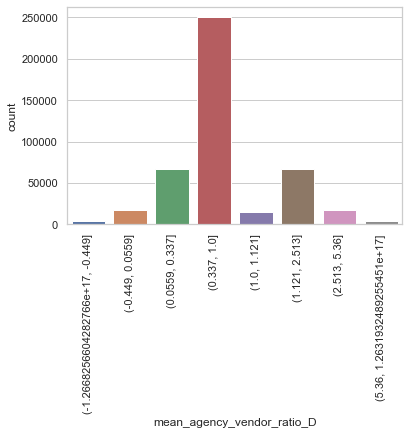

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="mean_agency_vendor_ratio_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 5.36, which is the right bar in the graph, then there is probably a fraudulent. 

In [56]:
df10[df10['mean_agency_vendor_ratio']>5.36].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,mean_agency_vendor,mean_agency_vendor_ratio,mean_agency_vendor_ratio_D
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,63.694438,8.975352,"(5.36, 1.2631932489255451e+17]"
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,381.322500,8.093333,"(5.36, 1.2631932489255451e+17]"
149,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Flock,S,11/4 GAL CPL EA|11/4 GAL CPL EA|16GLPROVAC EA|...,605.41,THE HOME DEPOT 3904,2013-07-25,2013-07-29,HOME SUPPLY WAREHOUSE STORES,2013,7,30,Thursday,78.697778,7.692847,"(5.36, 1.2631932489255451e+17]"
169,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Aichele,C,T25 DIGITAL PROMO PKG 115V EA,2497.36,VWR INTERNATIONAL INC,2013-07-30,2013-07-30,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,31,Tuesday,215.559759,11.585465,"(5.36, 1.2631932489255451e+17]"
256,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,PUMP WITH SIDE MOUNTED FL EA,1691.68,WW GRAINGER,2013-07-26,2013-07-29,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,237.945701,7.109521,"(5.36, 1.2631932489255451e+17]"


###  3.11 Feature 11: The ratio to median amount by vendor per month<a class="anchor" id="41"></a>
- Grouping by Agency and Vendor and obtaining the median amount spent. This includes a time perspective to the variable to adjust for time sensitive factors and helps to understand the monthly median expenditure in an agency per vendor. 

In [57]:
# create median spending grouped by Agency, Vendor and Month
stat_by_agency_ved = df.groupby(['Agency Name', 'Vendor', 'Month'])['Amount'].median() 
stat_by_agency_ved = pd.DataFrame(stat_by_agency_ved)
stat_by_agency_ved.columns = ['median_agency_vendor']
stat_by_agency_ved

median_agency_vendor
Agency Name                     Vendor               Month                      
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS        12                    92.50
                                CDW GOVERNMENT       7                   -637.75
                                                     8                    669.08
                                                     9                   -334.54
                                                     10                   334.54
...                                                                          ...
`DEPARTMENT OF EDUCATION        WWW.LOGMEIN.COM      11                   149.00
                                WYNDHAM GARDEN HOTEL 1                      0.00
                                                     12                    87.00
                                XPEDX-INTL PAPER     8                    180.70
                                                     12                   478.17

[189209 rows x 1 columns]

In [58]:
# add the new feature median spending to the dataset
df11 = pd.merge(df, stat_by_agency_ved, how='left', on=['Agency Name', 'Vendor', 'Month'])
# Feature 11: the ratio of amount spending and median amount by vendor per month
df11['median_agency_vendor_ratio'] = np.where(df11['median_agency_vendor']==0,0, df11['Amount'] / df11['median_agency_vendor'])
df11['median_agency_vendor_ratio'].describe()

count    442458.000000
mean          1.798033
std          98.046931
min       -2087.333333
25%           0.822357
50%           1.000000
75%           1.166989
max       63226.000000
Name: median_agency_vendor_ratio, dtype: float64

In [59]:
# cut by percentile for plotting
var = 'median_agency_vendor_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut( df11[var],percentile)

[Text(0, 0, '(-2087.3340000000003, -0.81]'),
 Text(1, 0, '(-0.81, 0.121]'),
 Text(2, 0, '(0.121, 0.632]'),
 Text(3, 0, '(0.632, 1.0]'),
 Text(4, 0, '(1.0, 1.449]'),
 Text(5, 0, '(1.449, 4.829]'),
 Text(6, 0, '(4.829, 15.044]'),
 Text(7, 0, '(15.044, 63226.0]')]

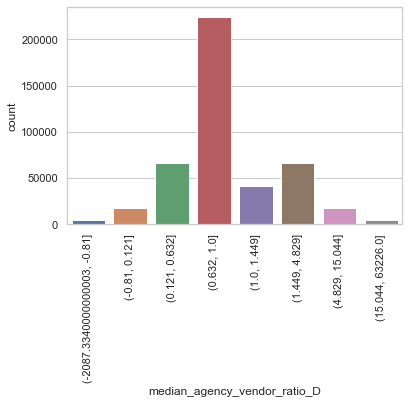

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_agency_vendor_ratio_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 15.044, which is the right bar in the graph, then there is probably a fraudulent. 

In [61]:
df11[df11['median_agency_vendor_ratio']>15.044].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,median_agency_vendor,median_agency_vendor_ratio,median_agency_vendor_ratio_D
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,103.750,23.009253,"(15.044, 63226.0]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,35.755,15.988813,"(15.044, 63226.0]"
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,81.340,37.941603,"(15.044, 63226.0]"
169,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Aichele,C,T25 DIGITAL PROMO PKG 115V EA,2497.36,VWR INTERNATIONAL INC,2013-07-30,2013-07-30,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,31,Tuesday,109.420,22.823615,"(15.044, 63226.0]"
256,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,PUMP WITH SIDE MOUNTED FL EA,1691.68,WW GRAINGER,2013-07-26,2013-07-29,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,103.490,16.346314,"(15.044, 63226.0]"


###  3.12 Feature 12: The ratio to average amount by vendor and description <a class="anchor" id="42"></a>
- Grouping by Agency, Vendor and Description and obtaining the mean amount. This helps to understand the mean expenditure for an agency by vendor and description. 

In [62]:
# create average spending grouped by Agency, Vendor, Description
stat_by_ved_d = df.groupby(['Agency Name','Vendor','Description'])['Amount'].mean() 
stat_by_ved_d = pd.DataFrame(stat_by_ved_d)
stat_by_ved_d.columns = ['mean_ved_desp']
stat_by_ved_d

mean_ved_desp
Agency Name                     Vendor                 Description                                                      
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS          GENERAL PURCHASE                                        92.500000
                                CDW GOVERNMENT         ASUS HD6450 SILENT EAH64 PCB                            38.160000
                                                       BELKIN HDBASET TX/RX AV PCB                            501.810000
                                                       BUFFALO NETWORK USB PRIN PCB|TP LINK WRLS-N DUAL B     194.850000
                                                       STARTECH HDMI OVER CAT5 PCB                           -501.810000
...                                                                                                                  ...
`DEPARTMENT OF EDUCATION        WORKPLACEDY            GENERAL PURCHASE                                      2350.000000
                                WWW FOUNDATIONSINC COM GENERAL PURCHASE                                       938.000000
                                WWW.LOGMEIN.COM        GENERAL PURCHASE                                       149.000000
                                WYNDHAM GARDEN HOTEL   ROOM CHARGES                                            93.282857
                                XPEDX-INTL PAPER       GENERAL PURCHASE                                       464.185000

[200356 rows x 1 columns]

In [63]:
# add the new feature average spending to the dataset
df12 = pd.merge(df, stat_by_ved_d, how='left', on=['Agency Name','Vendor','Description'])
# Feature 12: the ratio to amount spending and avergae spending by vendor and description
df12['mean_ved_desp_ratio'] = np.where(df12['mean_ved_desp']==0,0, df12['Amount'] / df12['mean_ved_desp'])
df12['mean_ved_desp_ratio'].describe()

count    4.424580e+05
mean     7.380857e-01
std      2.712696e+14
min     -6.944551e+16
25%      6.396794e-01
50%      1.000000e+00
75%      1.000000e+00
max      6.424385e+16
Name: mean_ved_desp_ratio, dtype: float64

In [64]:
# cut by percentile for plotting
var = 'mean_ved_desp_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut( df12[var],percentile)

[Text(0, 0, '(-6.944550625405305e+16, -0.344]'),
 Text(1, 0, '(-0.344, 0.0729]'),
 Text(2, 0, '(0.0729, 0.484]'),
 Text(3, 0, '(0.484, 1.0]'),
 Text(4, 0, '(1.0, 1.038]'),
 Text(5, 0, '(1.038, 2.202]'),
 Text(6, 0, '(2.202, 4.797]'),
 Text(7, 0, '(4.797, 6.424384868444013e+16]')]

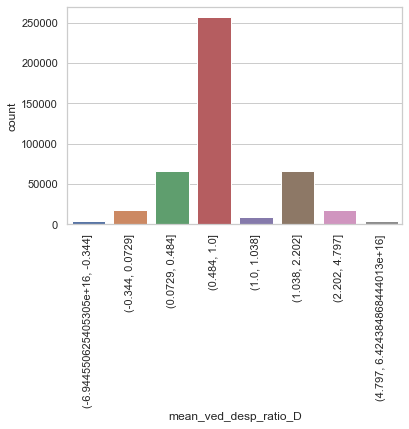

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="mean_ved_desp_ratio_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 4.797, which is the right bar in the graph, then there is probably a fraudulent. 

In [66]:
df12[df12['mean_ved_desp_ratio']>4.797].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,mean_ved_desp,mean_ved_desp_ratio,mean_ved_desp_ratio_D
29,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gann,D,CYLCARBONDIOXIDEIND200CGA3 MO|CYLCARBONDIOXIDE...,112.80,AIRGAS CENTRAL,2013-07-26,2013-07-29,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Friday,19.519302,5.778895,"(4.797, 6.424384868444013e+16]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,429.909032,5.552826,"(4.797, 6.424384868444013e+16]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,31.674651,6.313882,"(4.797, 6.424384868444013e+16]"
85,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,324.00,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,16.625000,19.488722,"(4.797, 6.424384868444013e+16]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,64.072270,8.922425,"(4.797, 6.424384868444013e+16]"


###  3.13 Feature 13: The ratio to median amount by vendor and description <a class="anchor" id="43"></a>
- Grouping by Agency, Vendor and Description and obtaining the median amount. This helps to understand the median expenditure for an agency by vendor and description.

In [67]:
# create median spending grouped by Agency, Vendor and Description
stat_by_ved_desc = df.groupby(['Agency Name', 'Vendor','Description'])['Amount'].median() 
stat_by_ved_desc = pd.DataFrame(stat_by_ved_desc)
stat_by_ved_desc.columns = ['median_ved_desc']
stat_by_ved_desc

median_ved_desc
Agency Name                     Vendor                 Description                                                        
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS          GENERAL PURCHASE                                             92.500
                                CDW GOVERNMENT         ASUS HD6450 SILENT EAH64 PCB                                 38.160
                                                       BELKIN HDBASET TX/RX AV PCB                                 501.810
                                                       BUFFALO NETWORK USB PRIN PCB|TP LINK WRLS-N DUAL B          194.850
                                                       STARTECH HDMI OVER CAT5 PCB                                -501.810
...                                                                                                                    ...
`DEPARTMENT OF EDUCATION        WORKPLACEDY            GENERAL PURCHASE                                           2350.000
                                WWW FOUNDATIONSINC COM GENERAL PURCHASE                                            938.000
                                WWW.LOGMEIN.COM        GENERAL PURCHASE                                            149.000
                                WYNDHAM GARDEN HOTEL   ROOM CHARGES                                                 87.000
                                XPEDX-INTL PAPER       GENERAL PURCHASE                                            329.435

[200356 rows x 1 columns]

In [68]:
# add the new feature median spending to the dataset
df13 = pd.merge(df, stat_by_ved_desc, how='left', on=['Agency Name', 'Vendor','Description'])
# Feature 13: ratio of amount spending and median amount by vendor and description  
df13['median_ved_desc_ratio'] = np.where(df13['median_ved_desc']==0,0, df13['Amount'] / df13['median_ved_desc'])
df13['median_ved_desc_ratio'].describe()

count    442458.000000
mean          1.435941
std         126.123841
min      -59114.000000
25%           0.972591
50%           1.000000
75%           1.011555
max       59116.000000
Name: median_ved_desc_ratio, dtype: float64

In [69]:
# cut by percentile for plotting
var = 'median_ved_desc_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut( df13[var],percentile)

[Text(0, 0, '(-59114.001, -0.571]'),
 Text(1, 0, '(-0.571, 0.157]'),
 Text(2, 0, '(0.157, 0.796]'),
 Text(3, 0, '(0.796, 1.0]'),
 Text(4, 0, '(1.0, 1.215]'),
 Text(5, 0, '(1.215, 3.828]'),
 Text(6, 0, '(3.828, 12.011]'),
 Text(7, 0, '(12.011, 59116.0]')]

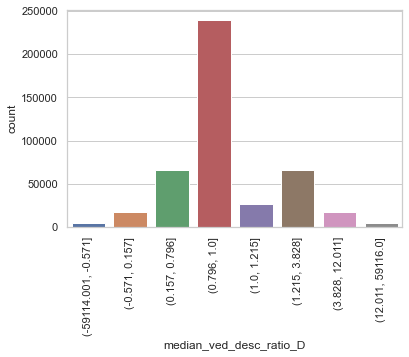

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_ved_desc_ratio_D", data=df13)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 12.011, then there is probably a fraudulent. 

In [71]:
df13[df13['median_ved_desc_ratio']>12.011].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,median_ved_desc,median_ved_desc_ratio,median_ved_desc_ratio_D
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,135.25,17.650351,"(12.011, 59116.0]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,10.32,19.378876,"(12.011, 59116.0]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,36.80,15.534783,"(12.011, 59116.0]"
116,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Henigman,B,GENERAL PURCHASE,1524.94,STILLWATER BUILDING CENTE,2013-07-26,2013-07-29,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,122.30,12.468847,"(12.011, 59116.0]"
326,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Biggs,J,GENERAL PURCHASE,400.00,MTM RECOGNITION ACCT DC,2013-07-29,2013-07-30,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2013,7,31,Monday,15.75,25.396825,"(12.011, 59116.0]"


###  3.14 Feature 14: The ratio to average amount by person, merchant category, and vendor per month <a class="anchor" id="44"></a>
- Grouping by Cardholder Last Name, Merchant Category Code (MCC), Vendor, Month and obtaining the average amount spent. This helps understand the mean expenditure by person, merchant category, and vendor in each month. It helps form a pattern and identify outliers.

In [72]:
# create average spending grouped by Cardholder Last Name, Merchant Category Code (MCC), Vendor, Month
stat_by_p_m_v_m = df.groupby(['Cardholder Last Name','Merchant Category Code (MCC)', 'Vendor', 'Month'])['Amount'].mean() 
stat_by_p_m_v_m = pd.DataFrame(stat_by_p_m_v_m)
stat_by_p_m_v_m.columns = ['mean_person_mcc_ved_m']
stat_by_p_m_v_m

mean_person_mcc_ved_m
Cardholder Last Name Merchant Category Code (MCC) Vendor                    Month                       
15000                OTHER FEES                   PAYMENT ADJUSTMENT        4                    4626.46
24100                OTHER FEES                   CREDIT PURCHASE FINANCE C 3                     -35.29
                                                  LATE PAYMENT FEE          7                    1796.09
                                                                            8                     734.50
                                                                            12                    250.00
...                                                                                                  ...
russell              TRAVEL AGENCIES              JOURNYHSE   DECKER        6                      25.00
                                                  JOURNYHSE   ELLER         6                      25.00
                                                  JOURNYHSE   ROGERS        6                      25.00
                                                  JOURNYHSE   SANDERS       6                      25.00
                     UNITED AIRLINES              UNITED      0167459356109 6                     568.00

[277700 rows x 1 columns]

In [73]:
# add the new feature average spending to the dataset
df14 = pd.merge(df, stat_by_p_m_v_m, how='left', on=['Cardholder Last Name','Merchant Category Code (MCC)', 'Vendor', 'Month'])
# Feature 14: ratio of amount spending and average amount by person, merchant category, and vendor per month 
df14['mean_person_mcc_ved_m_ratio'] = np.where(df14['mean_person_mcc_ved_m']==0,0, df14['Amount'] / df14['mean_person_mcc_ved_m'])
df14['mean_person_mcc_ved_m_ratio'].describe()

count    4.424580e+05
mean     9.545395e-01
std      4.410564e+14
min     -1.266826e+17
25%      9.084776e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.263193e+17
Name: mean_person_mcc_ved_m_ratio, dtype: float64

In [74]:
# cut by percentile for plotting
var = 'mean_person_mcc_ved_m_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut( df14[var],percentile)

[Text(0, 0, '(-1.2668256604282766e+17, -0.4127104221222966]'),
 Text(1, 0, '(-0.4127104221222966, 0.09943969828611467]'),
 Text(2, 0, '(0.09943969828611467, 0.6891318242808125]'),
 Text(3, 0, '(0.6891318242808125, 1.0]'),
 Text(4, 0, '(1.0, 1.0000000000000002]'),
 Text(5, 0, '(1.0000000000000002, 2.0330660609709357]'),
 Text(6, 0, '(2.0330660609709357, 3.808627356569644]'),
 Text(7, 0, '(3.808627356569644, 1.2631932489255451e+17]')]

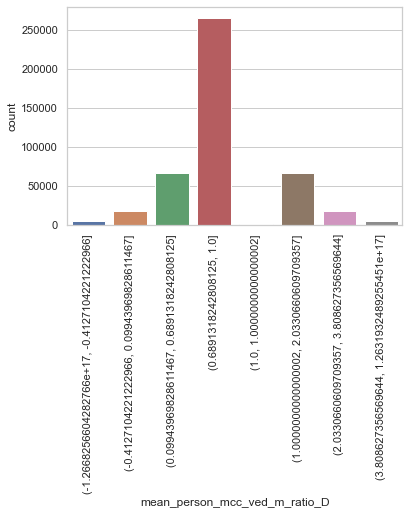

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="mean_person_mcc_ved_m_ratio_D", data=df14)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 3.809, which is the right bar in the graph, then there is probably a fraudulent. 

In [76]:
df14[df14['mean_person_mcc_ved_m_ratio']>3.809].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,mean_person_mcc_ved_m,mean_person_mcc_ved_m_ratio,mean_person_mcc_ved_m_ratio_D
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,692.005000,4.459751,"(3.808627356569644, 1.2631932489255451e+17]"
125,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,GENERAL PURCHASE,527.40,STILLWATER WINNELSON C,2013-07-30,2013-07-31,PLUMBING AND HEATING EQUIPMENT AND SUPPLIES,2013,7,31,Tuesday,86.100667,6.125388,"(3.808627356569644, 1.2631932489255451e+17]"
307,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Coppick,L,GENERAL PURCHASE,71.80,STILLWATER MILLING COMP,2013-07-29,2013-07-30,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2013,7,31,Monday,8.975000,8.000000,"(3.808627356569644, 1.2631932489255451e+17]"
442,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,KELOUGH,N,GENERAL PURCHASE,2057.31,LOCKE SUPPLY OKMULGEE,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,108.210000,19.012199,"(3.808627356569644, 1.2631932489255451e+17]"
587,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Kodadhala,N,H2OSU WATER 6PK 24NR EA|MM LEMONADE BNB 2.5 E...,162.53,GRT PLAINS COCA COLA,2013-07-25,2013-07-29,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2013,7,30,Thursday,32.633750,4.980427,"(3.808627356569644, 1.2631932489255451e+17]"


###  3.15 Feature 15: The ratio to median amount by person, merchant category, and vendor per month <a class="anchor" id="45"></a>
- Grouping by Cardholder Last Name, Merchant Category Code (MCC), Vendor, Month and obtaining the median amount spent. This helps understand the median expenditure by person, merchant category, and vendor in each month. It helps form a pattern and identify outliers.

In [77]:
# create median spending grouped by Cardholder Last Name, Merchant Category Code (MCC), Vendor, Month
stat_by_p_m_v_m = df.groupby(['Cardholder Last Name','Merchant Category Code (MCC)', 'Vendor', 'Month'])['Amount'].median() 
stat_by_p_m_v_m = pd.DataFrame(stat_by_p_m_v_m)
stat_by_p_m_v_m.columns = ['median_person_mcc_ved_m']
stat_by_p_m_v_m

median_person_mcc_ved_m
Cardholder Last Name Merchant Category Code (MCC) Vendor                    Month                         
15000                OTHER FEES                   PAYMENT ADJUSTMENT        4                      4626.46
24100                OTHER FEES                   CREDIT PURCHASE FINANCE C 3                       -35.29
                                                  LATE PAYMENT FEE          7                      1796.09
                                                                            8                       734.50
                                                                            12                      250.00
...                                                                                                    ...
russell              TRAVEL AGENCIES              JOURNYHSE   DECKER        6                        25.00
                                                  JOURNYHSE   ELLER         6                        25.00
                                                  JOURNYHSE   ROGERS        6                        25.00
                                                  JOURNYHSE   SANDERS       6                        25.00
                     UNITED AIRLINES              UNITED      0167459356109 6                       568.00

[277700 rows x 1 columns]

In [78]:
# add the new feature median spending to the dataset
df15 = pd.merge(df, stat_by_p_m_v_m, how='left', on=['Cardholder Last Name','Merchant Category Code (MCC)', 'Vendor', 'Month'])
# Feature 15: ratio of amount spending and median amount by person, merchant category, and vendor per month  
df15['median_person_mcc_ved_m_ratio'] = np.where(df15['median_person_mcc_ved_m']==0,0, df15['Amount'] / df15['median_person_mcc_ved_m'])
df15['median_person_mcc_ved_m_ratio'].describe()

count    442458.000000
mean          1.448519
std          98.141196
min       -2087.333333
25%           1.000000
50%           1.000000
75%           1.000000
max       63226.000000
Name: median_person_mcc_ved_m_ratio, dtype: float64

In [79]:
# cut by percentile for plotting
var = 'median_person_mcc_ved_m_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut( df15[var],percentile)

[Text(0, 0, '(-2087.3340000000003, -0.648]'),
 Text(1, 0, '(-0.648, 0.17]'),
 Text(2, 0, '(0.17, 0.952]'),
 Text(3, 0, '(0.952, 1.0]'),
 Text(4, 0, '(1.0, 1.018]'),
 Text(5, 0, '(1.018, 2.636]'),
 Text(6, 0, '(2.636, 9.567]'),
 Text(7, 0, '(9.567, 63226.0]')]

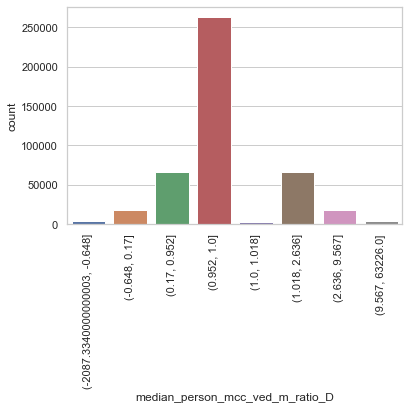

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_person_mcc_ved_m_ratio_D", data=df15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- If the ratio is larger than 9.567, which is the right bar in the graph, then there is probably a fraudulent. 

In [81]:
df15[df15['median_person_mcc_ved_m_ratio']>9.567].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Year,Month,Week_Number,Day_of_Week,median_person_mcc_ved_m,median_person_mcc_ved_m_ratio,median_person_mcc_ved_m_ratio_D
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,4.190,14.000000,"(9.567, 63226.0]"
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,46.865,12.198442,"(9.567, 63226.0]"
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,285.370,10.814627,"(9.567, 63226.0]"
242,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Tanner,J,PC 15 DRILL PRESS EA,295.00,LOWES #00241,2013-07-30,2013-07-31,HOME SUPPLY WAREHOUSE STORES,2013,7,31,Tuesday,23.720,12.436762,"(9.567, 63226.0]"
340,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,JANITORIAL SUPPLIES NMB,1831.89,"GRIMSLEY'S, INC.",2013-07-26,2013-07-29,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,187.630,9.763311,"(9.567, 63226.0]"


## Section 4 Conclusion <a class="anchor" id="4"></a>

The Office of Management and Enterprise Services in the State of Oklahoma has made its purchase credit card transactions available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions.

In this assignment, I created 15 features that will help a model to better identify anomalies or outliers in the dataset. Fraud detection features can be created by the R-F-M principle. I used the transaction aggregation strategy, by incorporating a combination criteria when grouping transactions. Followed by calculating the mean and median amount spent on those transactions to reveal some insights from the dataset. 

The thought process of these features is to determine the average or median ratios of one or more variables by dividing their average or median values by the actual amount. Transactions with low or average ratios are considered normal, while transactions with high ratios, meaning actual amounts significantly greater than average or median values, are flagged as potential fraud.

#### Here is a list of 15 features:
- Feature 1: The ratio to average amount by merchant category
- Feature 2: The ratio to median amount by merchant category
- Feature 3: The ratio to average amount by merchant category per month
- Feature 4: The ratio to median amount by merchant category per month
- Feature 5: The ratio to average amount by day of the week per month
- Feature 6: The ratio to average amount by person per month in each year
- Feature 7: The ratio to median amount by person per month in each year
- Feature 8: The ratio to average amount by person per merchant category
- Feature 9: The ratio to median amount by person per merchant category
- Feature 10: The ratio to average amount by vendor per month
- Feature 11: The ratio to median amount by vendor per month
- Feature 12: The ratio to average amount by vendor and description
- Feature 13: The ratio to median amount by vendor and descriotion
- Feature 14: The ratio to average amount by person, merchant category and vendor per month
- Feature 15: The ratio to median amount by person, merchant category, and vendor per month